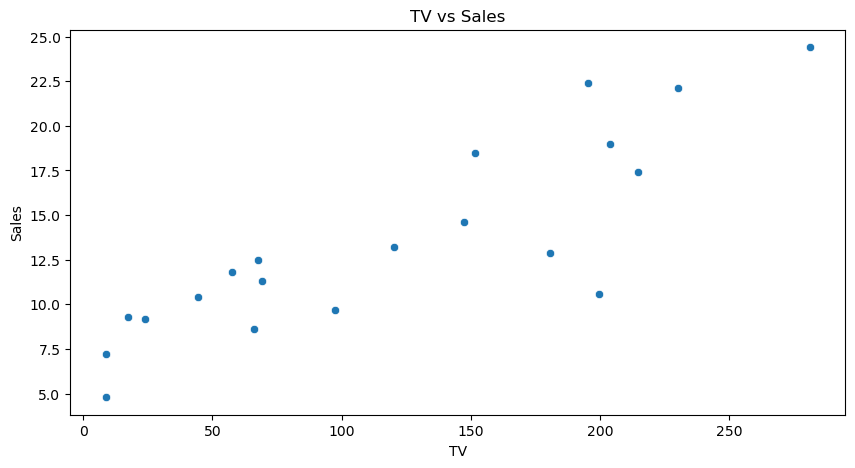

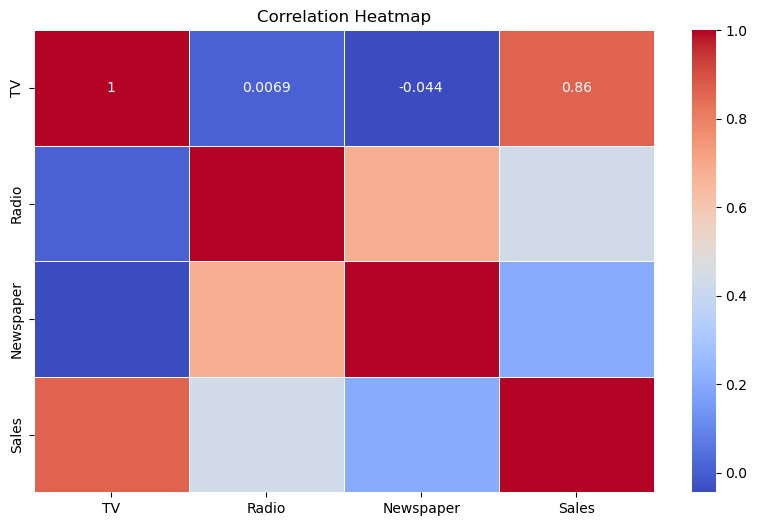

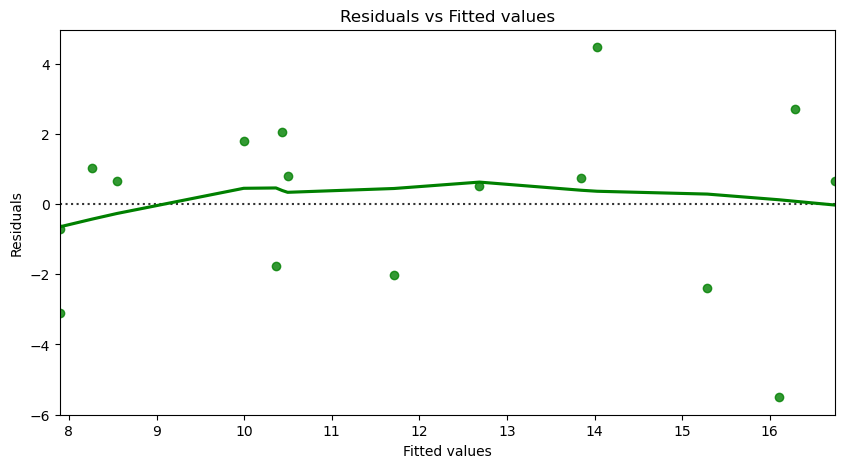

Missing values in each column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Shapes of the training and testing data:
X_train shape: (16, 3)
X_test shape: (4, 3)
y_train shape: (16,)
y_test shape: (4,)
Simple Linear Regression Coefficients:
Intercept: 7.526390583104876
Coefficient: 0.042927422724689274
Multiple Linear Regression Coefficients:
Intercept: 11.9125
Coefficients: [ 3.50220124  2.28494625 -0.52358732]
Simple Linear Regression - TV as Predictor:
RMSE: 4.691061963822781
MSE: 22.006062348424845
MAE: 4.234693058062244
R2: 0.27592284620725605
Multiple Linear Regression - All Predictors:
RMSE: 1.941142914033382
MSE: 3.76803581270201
MAE: 1.8187607047743537
R2: 0.8760183169777445
  Metric  Simple Linear Regression  Multiple Linear Regression
0   RMSE                  4.691062                    1.941143
1    MSE                 22.006062                    3.768036
2    MAE                  4.234693                    1.818761
3     R2                  0

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Utilize Libraries and Import the Dataset
df = pd.read_csv('advertising.csv')

# Step 2: Data Visualization and Enhancement

# Generate EDA graphs
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('TV vs Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Validate the assumptions of linear regression using residual plots
X_simple = df[['TV']]
y_simple = df['Sales']
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Simple Linear Regression
simple_model = LinearRegression().fit(X_train_simple, y_train_simple)
y_train_simple_pred = simple_model.predict(X_train_simple)

plt.figure(figsize=(10, 5))
sns.residplot(x=y_train_simple_pred, y=y_train_simple - y_train_simple_pred, lowess=True, color='g')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Split multiple linear regression data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the training and testing data
print("Shapes of the training and testing data:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Step 3: Model Development

# Simple Linear Regression Model (TV -> Sales)
simple_model = LinearRegression().fit(X_train_simple, y_train_simple)

# Display the model coefficients
print(f"Simple Linear Regression Coefficients:\nIntercept: {simple_model.intercept_}\nCoefficient: {simple_model.coef_[0]}")

# Step 4: Development of Multiple Linear Regression Model
multiple_model = LinearRegression().fit(X_train_scaled, y_train)

# Display the model coefficients
print(f"Multiple Linear Regression Coefficients:\nIntercept: {multiple_model.intercept_}\nCoefficients: {multiple_model.coef_}")

# Step 5: Model Assessment

# Simple Linear Regression Metrics
y_test_simple_pred = simple_model.predict(X_test_simple)

# Calculate metrics for the simple model
rmse_simple = mean_squared_error(y_test_simple, y_test_simple_pred, squared=False)
mse_simple = mean_squared_error(y_test_simple, y_test_simple_pred)
mae_simple = mean_absolute_error(y_test_simple, y_test_simple_pred)
r2_simple = r2_score(y_test_simple, y_test_simple_pred)

print(f"Simple Linear Regression - TV as Predictor:\nRMSE: {rmse_simple}\nMSE: {mse_simple}\nMAE: {mae_simple}\nR2: {r2_simple}")

# Multiple Linear Regression Metrics
y_test_pred = multiple_model.predict(X_test_scaled)

# Calculate metrics for the multiple model
rmse_multiple = mean_squared_error(y_test, y_test_pred, squared=False)
mse_multiple = mean_squared_error(y_test, y_test_pred)
mae_multiple = mean_absolute_error(y_test, y_test_pred)
r2_multiple = r2_score(y_test, y_test_pred)

print(f"Multiple Linear Regression - All Predictors:\nRMSE: {rmse_multiple}\nMSE: {mse_multiple}\nMAE: {mae_multiple}\nR2: {r2_multiple}")

# Compare Metrics & Business Scenarios
metrics_comparison = {
    'Metric': ['RMSE', 'MSE', 'MAE', 'R2'],
    'Simple Linear Regression': [rmse_simple, mse_simple, mae_simple, r2_simple],
    'Multiple Linear Regression': [rmse_multiple, mse_multiple, mae_multiple, r2_multiple]
}

metrics_df = pd.DataFrame(metrics_comparison)
print(metrics_df)

# Discussion and interpretation of results
print("\nBusiness Implications:")
if rmse_multiple < rmse_simple:
    print("Multiple linear regression provides better predictions and is preferred for better accuracy in sales predictions.")
else:
    print("Simple linear regression might suffice for quick and approximate predictions due to easier interpretation.")
